In [2]:

import pandas as pd
import seaborn as sns
import pickle
import json
from datetime import datetime,time,timedelta
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pprint import pprint
df = pd.read_hdf("store.h5")

df["time_of_day"] = df['time'].apply(lambda x: datetime.fromtimestamp(x).time())
df["day_of_month"] = df['time'].apply(lambda x: int((datetime.fromtimestamp(x)).strftime("%d")))
df["date"] = df['time'].apply(lambda x: (datetime.fromtimestamp(x)).strftime("%Y-%m-%d"))
# df["day_of_month"].astype(int,inplace = True)
df["range"] = df["high"] - df["low"]

exchange_times = {
    'asia': [time(),time(hour = 6)],
    'usa': [time(hour=13,minute=30),time(hour = 20)],
    'euro': [time(hour=8),time(hour=16,minute=30)],
    
}

df['is_asia'] = (exchange_times["asia"][0] <= df['time_of_day']) & (df['time_of_day'] <= exchange_times["asia"][1])
df['is_usa'] = (exchange_times["usa"][0] <= df['time_of_day']) & (df['time_of_day'] <= exchange_times["usa"][1])
df['is_euro'] = (exchange_times["euro"][0] <= df['time_of_day']) & (df['time_of_day'] <= exchange_times["euro"][1])

In [3]:
df.head()

,time,low,high,open,close,volume,day,time_of_day,day_of_month,date,range,is_asia,is_usa,is_euro
date_time,,,,,,,,,,,,,,
2017-07-31 12:00:00,1501466400,194.00,196.00,194.33,195.28,2841.638143,0,12:00:00,31,2017-07-31,2.00,False,False,True
2017-07-31 13:00:00,1501470000,194.92,196.49,195.29,195.40,2157.584857,0,13:00:00,31,2017-07-31,1.57,False,False,True
2017-07-31 14:00:00,1501473600,195.00,195.97,195.39,195.77,1311.341183,0,14:00:00,31,2017-07-31,0.97,False,True,True
2017-07-31 15:00:00,1501477200,195.00,195.90,195.77,195.41,1739.863734,0,15:00:00,31,2017-07-31,0.90,False,True,True
2017-07-31 16:00:00,1501480800,195.06,197.50,195.43,197.34,2879.591574,0,16:00:00,31,2017-07-31,2.44,False,True,True


In [17]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [7]:
EURO = df[df["is_euro"] == True]
dates = df.groupby("date").mean().index
dates
list_by_date_euro = []
for i in range(len(dates)):
    list_by_date_euro.append(EURO[EURO["date"] == dates[i]])


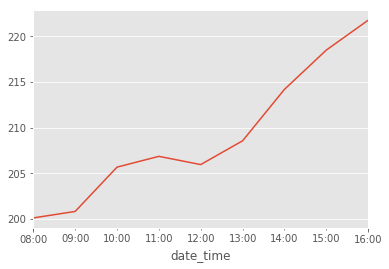

In [15]:
list_by_date_euro[1]["close"].plot()

In [32]:
m_euro = np.zeros(len(list_by_date_euro))
for i in range(len(list_by_date_euro)):
    X = np.array(range(len(list_by_date_euro[i]["close"])))
    X_bar = X.mean()
    X_bar
    Y = list_by_date_euro[i]["close"].values
    Y_bar = Y.mean()
    m_euro[i] = np.sum((X - X_bar)* (Y - Y_bar))/np.sum((X - X_bar)**2)


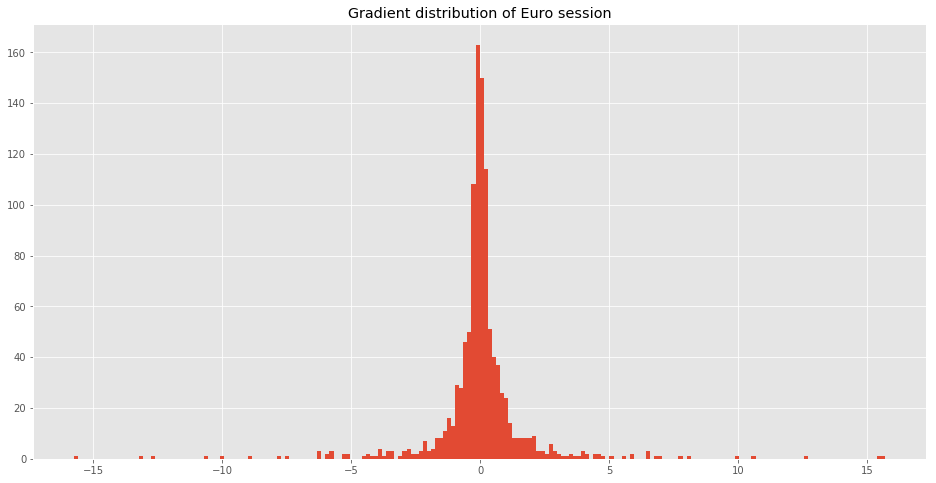

In [42]:
plt.figure(figsize=(16,8))
plt.hist(m_euro,bins = 200)
plt.title("Gradient distribution of Euro session")
plt.savefig("../../../report/fig/grad_euro.png",dpi=250)
plt.show()

In [38]:
USA = df[df["is_usa"] == True]
dates = df.groupby("date").mean().index
dates
list_by_date_usa = []
for i in range(len(dates)):
    list_by_date_usa.append(USA[USA["date"] == dates[i]])
m_usa = np.zeros(len(list_by_date_usa))
for i in range(len(list_by_date_usa)):
    X = np.array(range(len(list_by_date_usa[i]["close"])))
    X_bar = X.mean()
    X_bar
    Y = list_by_date_usa[i]["close"].values
    Y_bar = Y.mean()
    m_usa[i] = np.sum((X - X_bar)* (Y - Y_bar))/np.sum((X - X_bar)**2)

/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/home/steve/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


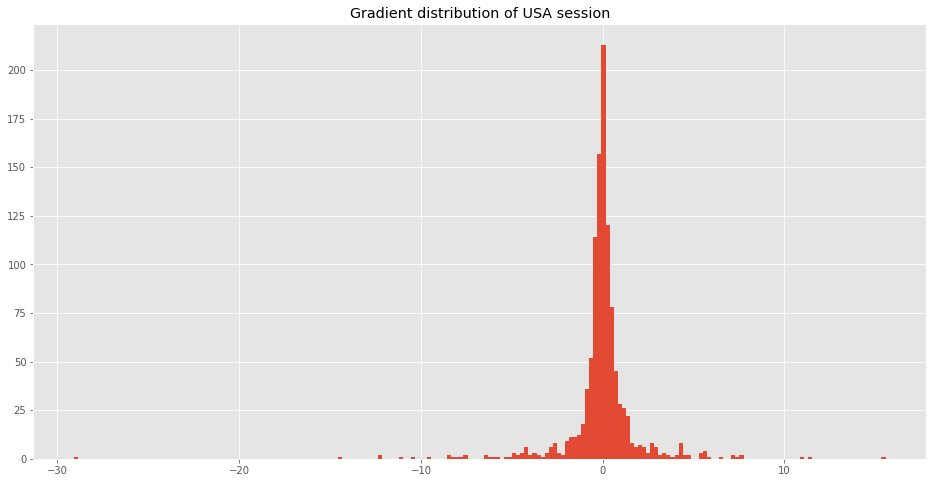

In [41]:
plt.figure(figsize=(16,8))
plt.hist(m_usa,bins = 200)
plt.title("Gradient distribution of USA session")
plt.savefig("../../../report/fig/grad_usa.png",dpi=250)
plt.show()